In [1]:
# Importing modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Read data into data
data = pd.read_csv('./NewsArticles.csv', encoding="ISO-8859-1")

# Print head
data.head(3)

,article_id,publish_date,article_source_link,title,subtitle,text,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143
0,1,2017/2/7,http://abcnews.go.com/Politics/pence-break-tie...,"Betsy DeVos Confirmed as Education Secretary, ...",NaN,Michigan billionaire education activist Betsy ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017/2/7,http://abcnews.go.com/Politics/wireStory/melan...,Melania Trump Says White House Could Mean Mill...,NaN,First lady Melania Trump has said little about...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017/2/7,http://abcnews.go.com/Politics/wireStory/trump...,"As Trump Fears Fraud, GOP Eliminates Election ...",NaN,A House committee voted on Tuesday to eliminat...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Remove the columns
articles = data[['title', 'text']]
articles.dropna(axis=0, how='any', inplace=True)

# Print out the first rows of articles
articles.head(3)

,title,text
0,"Betsy DeVos Confirmed as Education Secretary, ...",Michigan billionaire education activist Betsy ...
1,Melania Trump Says White House Could Mean Mill...,First lady Melania Trump has said little about...
2,"As Trump Fears Fraud, GOP Eliminates Election ...",A House committee voted on Tuesday to eliminat...


In [3]:
# Load the regular expression library
import re

# Remove punctuation
articles['text_processed'] = \
articles['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
articles['text_processed'] = \
articles['text_processed'].map(lambda x: x.lower())

# Print out the first rows of articles
articles['text_processed'].head(3)

0    michigan billionaire education activist betsy ...
1    first lady melania trump has said little about...
2    a house committee voted on tuesday to eliminat...
Name: text_processed, dtype: object

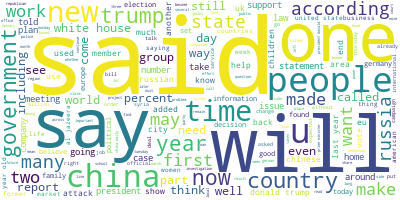

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(articles['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = articles.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashish/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['michigan', 'billionaire', 'education', 'activist', 'betsy', 'devos', 'confirmed', 'today', 'serve', 'secretary', 'education', 'president', 'trump', 'administration', 'vice', 'president', 'mike', 'pence', 'cast', 'tie', 'breaking', 'vote', 'senate', 'senate', 'voted', 'devos', 'highly', 'contentious', 'nomination', 'afternoon']


In [6]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [7]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"said" + 0.007*"trump" + 0.005*"us" + 0.004*"also" + 0.004*"one" + '
  '0.004*"people" + 0.004*"government" + 0.003*"would" + 0.003*"president" + '
  '0.003*"state"'),
 (1,
  '0.008*"said" + 0.005*"us" + 0.005*"china" + 0.005*"says" + 0.005*"one" + '
  '0.004*"also" + 0.004*"new" + 0.003*"year" + 0.003*"president" + '
  '0.003*"trump"'),
 (2,
  '0.015*"said" + 0.004*"people" + 0.004*"new" + 0.004*"would" + '
  '0.003*"president" + 0.003*"trump" + 0.003*"also" + 0.003*"says" + '
  '0.003*"two" + 0.003*"us"'),
 (3,
  '0.010*"said" + 0.006*"us" + 0.005*"trump" + 0.004*"china" + 0.004*"new" + '
  '0.003*"would" + 0.003*"people" + 0.003*"president" + 0.003*"year" + '
  '0.003*"also"'),
 (4,
  '0.011*"said" + 0.005*"trump" + 0.004*"new" + 0.004*"year" + 0.004*"us" + '
  '0.004*"president" + 0.003*"also" + 0.003*"china" + 0.003*"one" + '
  '0.003*"two"'),
 (5,
  '0.014*"said" + 0.006*"trump" + 0.005*"would" + 0.005*"china" + 0.005*"us" + '
  '0.004*"one" + 0.004*"people" + 0.004

In [8]:

import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb+') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/opt/anaconda3/envs/env-TM2020/lib/python3.7/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.015762  0.003841       1        1  16.215571
0     -0.005410 -0.007478       2        1  13.730442
2     -0.001957  0.005392       3        1  12.557639
5      0.000316  0.002634       4        1  10.170393
6     -0.000849 -0.015914       5        1   8.560595
4      0.002211  0.005790       6        1   8.471254
3      0.000973 -0.001171       7        1   8.275498
8     -0.000134  0.004055       8        1   7.808785
1      0.016096 -0.000666       9        1   7.548607
7      0.004517  0.003517      10        1   6.661216, topic_info=       Term         Freq        Total Category  logprob  loglift
786      us  4931.000000  4931.000000  Default  30.0000  30.0000
3423  china  3920.000000  3920.000000  Default  29.0000  29.0000
112     one  3907.000000  3907.000000  Default  28.0000  28.0000
184   would  4195.000000  4195.000000  Default  27.0000  27.0000
404    says  2966.000000  2966.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
292   house   134.180196  2376.657805  Topic10  -6.3402  -0.1654
629    told   133.449383  2616.638788  Topic10  -6.3456  -0.2671
3423  china   146.124830  3920.530541  Topic10  -6.2549  -0.5807
421   state   123.738684  2293.333524  Topic10  -6.4212  -0.2107
88     like   116.119916  1907.131371  Topic10  -6.4847  -0.0899

[899 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
45629     10  0.552243  abbeyfeale
41108      2  0.203463        abta
41108      3  0.508659        abta
41108      5  0.101732        abta
41108      9  0.101732        abta
...      ...       ...         ...
9503       4  0.218763      zhukov
9503       6  0.437526      zhukov
25129      1  0.212350        zohr
25129      5  0.212350        zohr
25129      8  0.424699        zohr

[3023 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 3, 6, 7, 5, 4, 9, 2, 8])